## Market Segementation ##

### Key Takeaways: ###

- **Hierarchical and K-means clustering are forms of unsupervised learning that can be used in the presence or absence of a response variable to find meaningful patterns among predictors.**


- **Clustering algorithms can inform corporate marketing efforts by segmenting the customer base into groups likely to be receptive to different offers and promotions.**


- **Numerical cluster labels are not inherently meaningful and are not presented in any particular order.**

### Background Information ###

Market segmentation divides a broad target market into smaller, similar groups. Companies then design a specific marketing strategy for each segment. Clustering algorithms are commonly used to partition target markets, as they look for sub-groups within a data set that share distinctive characteristics.

(source: MITx)

### The Problem ###

An airline has a frequent flyer program. Management wishes to learn more about this group, so that it can target different sub-segments with assorted, mileage-based offers. Use clustering to help them accomplish their objective.

(source: MITx)

### The Data

The data come from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. There are seven features in the dataset:

**Balance:** number of miles eligible for award travel

**QualMiles:** number of miles qualifying for TopFlight status

**BonusMiles:** number of miles earned from non-flight bonus 

**Transactions:** in the past 12 months

**BonusTrans:** number of non-flight bonus transactions in the past 12 months

**FlightMiles:** number of flight miles in the past 12 months

**FlightTrans:** number of flight transactions in the past 12 months

**DaysSinceEnroll:** number of days since enrolled in the frequent flyer program

(source: MITx)

In [20]:
install.packages("caret")
suppressPackageStartupMessages(library(caret))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
airlines = read.csv("AirlinesCluster.csv")

### Data Structure ###

In [3]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


### Data Summary ###

In [4]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

### Exploratory Data Analysis ###

The data summary suggests our variables take on a wide array of values. We believe it would be fruitful to examine this range a bit more closely.

The Balance feature contains the largest value in our data set.

In [21]:
sort(sapply(airlines,max), decreasing=TRUE, method='radix')

Balance      BonusMiles     FlightMiles       QualMiles DaysSinceEnroll 
        1704838          263685           30817           11148            8296 
     BonusTrans     FlightTrans 
             86              53

The FlightTrans feature has the smallest value in our data set.

In [22]:
sort(sapply(lapply(airlines, mean), min), decreasing=FALSE, method='radix')

FlightTrans      BonusTrans       QualMiles     FlightMiles DaysSinceEnroll 
       1.373593       11.601900      144.114529      460.055764     4118.559390 
     BonusMiles         Balance 
   17144.846212    73601.327582

There is a vast discrepancy in scale among our variables. This is problematic in clustering where averages are relied upon to place observations within clusters. Below, we normalize the data to prevent larger values from dominating our calculations.

In [4]:
# preprocessing
preproc = preProcess(airlines)
# normalization step
airlinesNorm = predict(preproc, airlines)

In [5]:
# verify normalization has occurred (mean = 0, sd = 1)
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

In [6]:
# retrieve standard deviations for normalized features
lapply(airlinesNorm, sd)

$Balance
[1] 1

$QualMiles
[1] 1

$BonusMiles
[1] 1

$BonusTrans
[1] 1

$FlightMiles
[1] 1

$FlightTrans
[1] 1

$DaysSinceEnroll
[1] 1

Each feature above has a mean of zero and a unit standard deviation. We can, therefore, conclude data normalization was successful.

Interestingly, prior to normalization, the variable with the maximum value was Balance. Post normalization, FlightMiles is in the top spot.

In [78]:
sort(sapply(airlinesNorm,max), decreasing=TRUE, method='radix')

FlightMiles         Balance       QualMiles     FlightTrans      BonusMiles 
      21.680292       16.186811       14.223084       13.610351       10.208293 
     BonusTrans DaysSinceEnroll 
       7.746727        2.022842

Additionally, pre-normalization, the FlightTrans variable was the smallest non-zero value in our data set. It has been supplanted by DaysSinceEnroll.

In [72]:
sort(sapply(airlinesNorm,min), decreasing=FALSE, method='radix')

DaysSinceEnroll      BonusTrans         Balance      BonusMiles     FlightTrans 
     -1.9933614      -1.2080518      -0.7303482      -0.7099031      -0.3621226 
    FlightMiles       QualMiles 
     -0.3285622      -0.1862754

### The Model: Hierarchical Clustering ###

We begin by computing Euclidean distances among the data points.

In [9]:
distances = dist(airlinesNorm, method="euclidean")

Next, we use the distances calculated above to cluster our data points.

In [10]:
airClusters = hclust(distances, method="ward.D")

Finally, we construct the dendrogram, which will guide our analysis going forward.

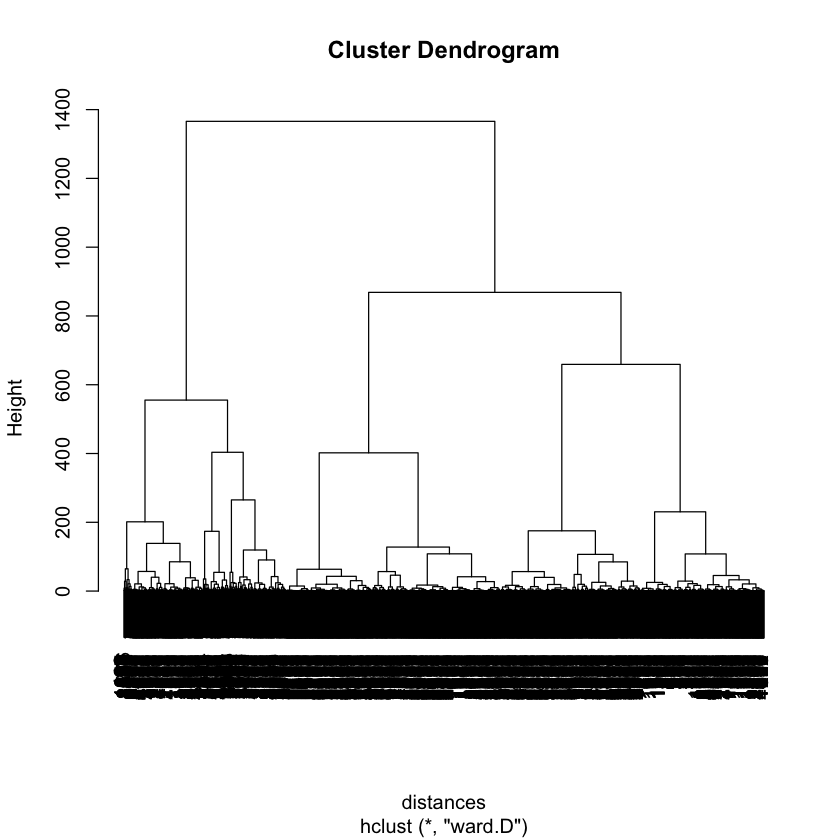

In [11]:
plot(airClusters)

Five appears to be a reasonable point at which to cut the tree, so we will have five clusters (i.e., customer segments) to explore.

In [12]:
clusterGrps = cutree(airClusters, k=5)

Below, we split our dataset based on the clusters into which the observations have been collected and display the number of observations each cluster contains. We will be on the lookout for the attributes of clusters 5 and 4, which contain the most customers. Marketing will undoubtedly be interested in targeting these groups.

In [23]:
spl = split(airlinesNorm, clusterGrps)
sort(sapply(spl, nrow), decreasing=TRUE, method='radix')

5    4    1    2    3 
1342  868  776  519  494

We'll now dig into the attributes of each cluster by examining their centroids. We'll use the original data, as this will facilitate interpretability.

In [14]:
spl2 = split(airlines, clusterGrps)
sapply(spl2, colMeans)

,1,2,3,4,5
Balance,5.786690e+04,1.106693e+05,1.981916e+05,52335.913594,3.625591e+04
QualMiles,6.443299e-01,1.065983e+03,3.034615e+01,4.847926,2.511177e+00
BonusMiles,1.036012e+04,2.288176e+04,5.579586e+04,20788.766129,2.264788e+03
BonusTrans,1.082345e+01,1.822929e+01,1.966397e+01,17.087558,2.973174e+00
FlightMiles,8.318428e+01,2.613418e+03,3.276761e+02,111.573733,1.193219e+02
FlightTrans,3.028351e-01,7.402697e+00,1.068826e+00,0.344470,4.388972e-01
DaysSinceEnroll,6.235365e+03,4.402414e+03,5.615709e+03,2840.822581,3.060081e+03


Cluster 1 contains the highest value for **DaysSinceEnroll**, but customers in this cluster travel few miles, execute few transactions, and maintain reasonably high balances. A fair characterization of this cluster is that these customers are loyal, but fly infrequently.

Cluster 2 maintains the largest values in **QualMiles**, **FlightMiles**, and **FlightTrans**. These are the airline's road warriors. They accumulate large amounts of miles and frequently execute flight transactions.

Cluster 3 exhibits the highest balances in the following categories: **Balance**, **BonusTrans**, **BonusMiles**. One is tempted to label members of cluster 3 "hoarders," however, this doesn't adequately explain their behavior. Rather, they have accumulated large numbers of frequent flyer miles without actually flying (e.g., credit card programs).

Cluster 4 is unremarkable insofar as it fails to exhibit a maximum value for any variable. Rather, customers in this cluster have low balances, transactions, miles, and days since enrollment. Hence, we conclude that they are fairly new and in the process of accumulating frequent flyer miles.

Cluster 5 is similar to cluster 4. Customers in this cohort appear to be relatively new and, based on their transaction, balance, and mileage accounts, use the airline infrequently.

Given that clusters 4 and 5 are the most populous clusters, it looks like our marketing department will be targeting the most infrequent of frequent flyers with promotional material.

### The Model: K-Means Clustering ###

We now run the k-means clustering algorithm on our normalized data.  As before, we will create 5 clusters. For this model, however, we must set a max iteration parameter and a random seed value, as shown below.

In [16]:
k = 5
set.seed(88)
KMC = kmeans(airlinesNorm, centers=k, iter.max=1000)
names(KMC)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

Accessing the clusters and splitting our dataset by cluster is accomplished with the following single line of code.

In [17]:
spl3 = split(airlines, KMC$cluster)

Two of our clusters are quite large relative to the remaining three.

In [18]:
KMC$size

[1]  776   57  143 1373 1650

In [19]:
sapply(spl3, colMeans)

,1,2,3,4,5
Balance,1.528793e+05,1.140122e+05,191736.33566,5.741614e+04,3.815031e+04
QualMiles,7.798711e+01,5.543333e+03,471.56643,5.510415e+01,3.438424e+01
BonusMiles,5.100809e+04,1.919668e+04,33093.33566,8.756787e+03,6.745658e+03
BonusTrans,2.131572e+01,1.229825e+01,28.35664,9.101238e+00,7.638182e+00
FlightMiles,4.799072e+02,9.397719e+02,5763.13287,2.135805e+02,1.796448e+02
FlightTrans,1.457474e+00,2.824561e+00,16.76923,6.460306e-01,5.551515e-01
DaysSinceEnroll,4.915534e+03,3.872175e+03,4666.41259,5.826598e+03,2.283476e+03


The k-means algorithm appears to have found clusters similar to those of the hierarchical method. The clusters, however, are not necessarily displayed in the same order. For example, cluster 1 under the hierarchical method had the highest balance for **DaysSinceEnroll**. Here, cluster 4 exhibits the highest balance in the **DaysSinceEnroll** account. The implication is that cluster numbers are merely labels with no intrinsic meaning. The clusters discovered by k-means, however, are substantially similar to those uncovered by hierarchical clustering.